# Задача бинарной классификации

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

/Users/pavlyuklybov/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.options.display.max_columns = 999

### Problem 1 & Problem 2

(1) Read the dataset into computer’s memory. Randomly choose 60% of all the observations for a training sample, and the rest for a test sample, but make sure both contain approximately the same proportions for all activities. (From now on assume that  tting a model means  tting it on the training sample, and testing means testing on the test sample).

(2) Normalize the X0–X21 variables to  t [0, 1].

In [3]:
data = pd.read_csv('activities.txt', sep ='\t')
data.head()

Y   X0      X1       X2       X3       X4        X5        X6        X7  \
0  1  100  30.375  2.30106  7.25857  6.09259 -0.069961 -0.018328  0.004582   
1  1  100  30.375  2.24615  7.48180  5.55219 -0.431227  0.002685 -0.062964   
2  1  100  30.375  2.30000  7.10681  6.09309  0.075692 -0.030792  0.005246   
3  1  100  30.375  2.49455  7.52335  6.17157 -0.259058 -0.267895 -0.038533   
4  1  101  30.375  2.71654  8.30596  4.78671  0.377115 -0.023688 -0.020670   

        X8        X9      X10      X11       X12       X13       X14    X15  \
0  32.1875  0.352225  9.72437 -1.68665  0.000275 -0.013352 -0.039315  30.75   
1  32.1875  0.125825  9.72560 -1.61331 -0.029411 -0.037321 -0.033805  30.75   
2  32.1875  0.199567  9.64954 -1.68917 -0.009560 -0.055878 -0.044714  30.75   
3  32.1875  0.279626  9.80069 -1.57205 -0.067753  0.020297 -0.012148  30.75   
4  32.1875  0.428255  9.64882 -1.68503  0.007856  0.001881 -0.058687  30.75   

       X16      X17       X18       X19       X20       X21  
0  9.77578 -1.88582  0.095775  0.001351 -0.048878 -0.006328  
1  9.73536 -2.03681  0.019118  0.005819 -0.017912  0.015243  
2  9.73745 -1.84729  0.056553  0.015376 -0.011798  0.011387  
3  9.58444 -1.84538 -0.060796 -0.012672 -0.009233  0.005823  
4  9.69963 -1.92299  0.056635  0.050959 -0.042562 -0.009289

In [4]:
data.describe()

/Users/pavlyuklybov/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Y            X0            X1            X2            X3  \
count  82552.000000  82552.000000  81812.000000  81812.000000  81812.000000   
mean       2.847744     97.748607     32.715881     -4.347099      3.357665   
std        1.315000     27.527264      1.570199      7.489594      7.804851   
min        1.000000     57.000000     27.937500    -94.135900    -82.550900   
25%        2.000000     77.000000           NaN           NaN           NaN   
50%        3.000000     90.000000           NaN           NaN           NaN   
75%        4.000000    113.000000           NaN           NaN           NaN   
max        5.000000    196.000000     35.250000     25.740500    155.354000   

                 X4            X5            X6            X7            X8  \
count  81812.000000  81812.000000  81812.000000  81812.000000  82430.000000   
mean       3.516097      0.002846      0.038546     -0.012314     35.896369   
std        3.733599      1.218903      0.982755      1.755213      1.485228   
min      -69.093500    -18.770700     -7.238610    -13.121500     32.062500   
25%             NaN           NaN           NaN           NaN           NaN   
50%             NaN           NaN           NaN           NaN           NaN   
75%             NaN           NaN           NaN           NaN           NaN   
max       30.898100     17.994100      9.694000     13.672200     38.437500   

                 X9           X10           X11           X12           X13  \
count  82430.000000  82430.000000  82430.000000  82430.000000  82430.000000   
mean       0.587623      7.909927      1.082969      0.010536      0.012357   
std        1.622956      5.110134      4.735899      0.397435      0.554640   
min      -39.203400    -15.345400    -33.542300     -4.183640     -4.859470   
25%             NaN           NaN           NaN           NaN           NaN   
50%             NaN           NaN           NaN           NaN           NaN   
75%             NaN           NaN           NaN           NaN           NaN   
max       19.698600     51.969600     20.477500      8.109970      5.822480   

                X14           X15           X16           X17           X18  \
count  82430.000000  82216.000000  82216.000000  82216.000000  82216.000000   
mean      -0.016736     33.553375      8.499420     -1.113808     -2.928890   
std        0.283279      1.105901      7.691283      8.169263      4.202593   
min       -3.705010     30.000000    -76.722200   -155.356000   -134.684000   
25%             NaN           NaN           NaN           NaN           NaN   
50%             NaN           NaN           NaN           NaN           NaN   
75%             NaN           NaN           NaN           NaN           NaN   
max        2.703920     35.000000    155.655000    105.577000     97.672100   

                X19           X20           X21  
count  82216.000000  82216.000000  82216.000000  
mean       0.007405     -0.041971      0.013471  
std        1.002168      0.644886      2.140151  
min       -8.357670     -6.234040    -11.539700  
25%             NaN           NaN           NaN  
50%             NaN           NaN           NaN  
75%             NaN           NaN           NaN  
max        9.514270      5.084100     14.288100

In [5]:
variables = list(data.columns)[1:]

In [6]:
# доля пропущенных значений
for i in variables:
    print ( i, "%.5f" % np.mean(pd.isnull(data[i]))  )

X0 0.00000
X1 0.00896
X2 0.00896
X3 0.00896
X4 0.00896
X5 0.00896
X6 0.00896
X7 0.00896
X8 0.00148
X9 0.00148
X10 0.00148
X11 0.00148
X12 0.00148
X13 0.00148
X14 0.00148
X15 0.00407
X16 0.00407
X17 0.00407
X18 0.00407
X19 0.00407
X20 0.00407
X21 0.00407


In [7]:
#доля чисел наблюдений без пропусков

In [8]:
len(data.dropna(axis =0 ))/ len(data)

0.9857423199922473

In [9]:
data_with_na = data.copy()

In [10]:
data = data.dropna(axis = 0)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:

scaler = MinMaxScaler()

In [13]:
data[variables] =  scaler.fit_transform(data [variables])

In [14]:
data.head()

Y        X0        X1        X2        X3        X4        X5        X6  \
0  1  0.309353  0.333333  0.804470  0.377502  0.751924  0.508659  0.426413   
1  1  0.309353  0.333333  0.804012  0.378440  0.746520  0.498832  0.427654   
2  1  0.309353  0.333333  0.804461  0.376864  0.751929  0.512621  0.425677   
3  1  0.309353  0.333333  0.806084  0.378615  0.752714  0.503515  0.411674   
4  1  0.316547  0.333333  0.807936  0.381904  0.738864  0.520819  0.426096   

         X7        X8        X9       X10       X11       X12       X13  \
0  0.489894  0.019608  0.671550  0.372425  0.589703  0.340332  0.453674   
1  0.487373  0.019608  0.667706  0.372443  0.591061  0.337918  0.451430   
2  0.489919  0.019608  0.668958  0.371313  0.589657  0.339532  0.449692   
3  0.488285  0.019608  0.670317  0.373558  0.591825  0.334799  0.456824   
4  0.488952  0.019608  0.672841  0.371302  0.589733  0.340949  0.455100   

        X14   X15       X16       X17       X18       X19       X20       X21  
0  0.571967  0.15  0.372231  0.588159  0.580057  0.467718  0.546482  0.446549  
1  0.572827  0.15  0.372057  0.587581  0.579727  0.467968  0.549218  0.447384  
2  0.571124  0.15  0.372066  0.588307  0.579888  0.468502  0.549758  0.447235  
3  0.576206  0.15  0.371408  0.588314  0.579383  0.466933  0.549985  0.447019  
4  0.568944  0.15  0.371903  0.588017  0.579889  0.470493  0.547040  0.446434

In [15]:
X_train, X_test, y_train, y_test = train_test_split(    data[variables], data['Y'], test_size=0.4, random_state=41)

print(X_train.shape , 
y_train.shape ,
X_test.shape,
y_test.shape)

(48825, 22) (48825,) (32550, 22) (32550,)


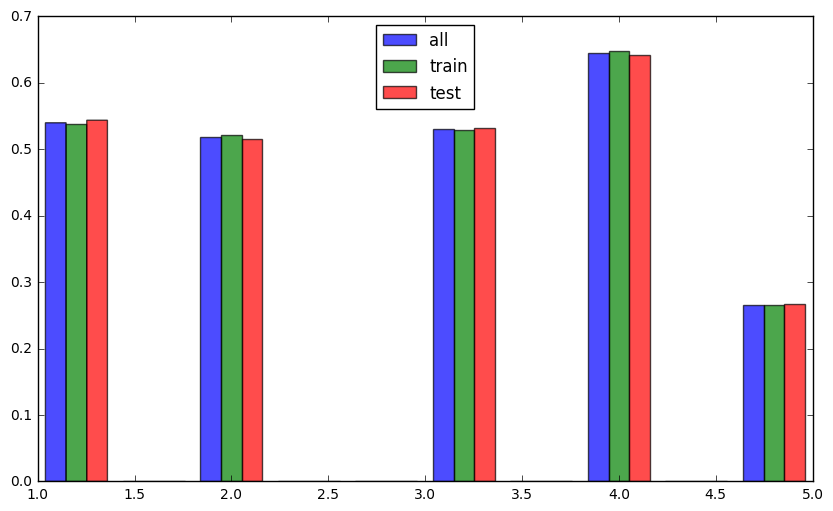

In [16]:
plt.figure( figsize = (10,6))
plt.hist([data['Y'], y_train, y_test] , normed= True , label= ['all', 'train', 'test'], alpha = 0.7)
plt.legend(loc = 'upper center')
plt.show()

нужно доказать, что доли классов в выборках не различимы статистически (ANOVA)

In [17]:
import scipy.stats as stats
#Return
# statistic : float
# The computed F-value of the test.
# pvalue : float
# The associated p-value from the F-distribution.

Нулевая гипотеза: отсутствие различий

P-value > 0.05 - не отклоняем её


In [18]:
stats.f_oneway(  y_train, y_test)

F_onewayResult(statistic=0.17487501021841448, pvalue=0.67581618574949864)

### Problem 3

(3) Fit the multinomial logit model, compute the predicted probabilities for test sample data
and form predictions based on maximum predicted probability. Report the probabilities of classi cation errors. Which variable is the most important in distinguishing standing from lying?

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(  random_state=42, solver='newton-cg',
                             multi_class= 'multinomial').fit(X_train, y_train)

In [21]:
log_regr_data_pred =(clf.predict(X_test))
# pd.DataFrame(clf.predict_proba(X_test)).idxmax(axis=1) +1

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

In [23]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[  9.30e-01   2.29e-02   4.18e-02   0.00e+00   5.08e-03]
 [  1.28e-02   8.79e-01   1.03e-01   4.62e-03   5.96e-04]
 [  0.00e+00   1.22e-01   8.78e-01   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   9.97e-01   3.35e-03]
 [  4.60e-03   5.46e-03   1.41e-02   4.23e-02   9.34e-01]]


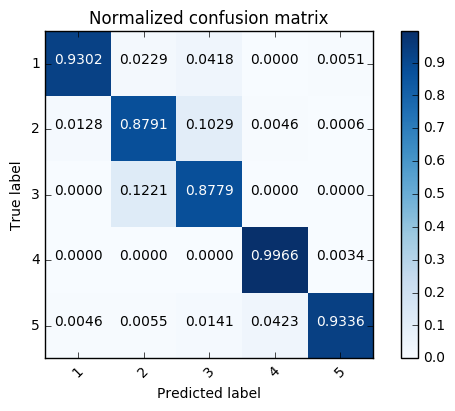

In [24]:
cnf_matrix = confusion_matrix(y_test,log_regr_data_pred)

class_names = [1,2,3,4,5]
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [25]:
(cnf_matrix/np.sum(cnf_matrix, axis = 1))[0][2]

0.042712842712842716

In [26]:
(cnf_matrix/np.sum(cnf_matrix, axis = 1))[2][0]

0.0

In [27]:
log_regr_data_pred

array([1, 2, 3, ..., 2, 4, 2])

In [28]:
#доля правильно классифицированных движений
np.mean(y_test == log_regr_data_pred)

0.92596006144393239

In [29]:
#доля неправильно классифицированных движений
1 - np.mean(y_test == log_regr_data_pred)

0.074039938556067608

In [30]:
for i in variables:
    variables2 = variables.copy()
    variables2.remove(i)

    clf2 = LogisticRegression(  random_state=42, solver='newton-cg',
                             multi_class= 'multinomial').fit( X_train[variables2], y_train)
    log_regr_data_pred2 = pd.DataFrame(clf2.predict(X_test[variables2]))
    
    cnf_matrix = confusion_matrix(y_test,log_regr_data_pred2)
    errors = (cnf_matrix/np.sum(cnf_matrix, axis = 1))[0][2] +(cnf_matrix/np.sum(cnf_matrix, axis = 1))[2][0] 
    
    print( i, errors)

X0 0.0417027417027
X1 0.0445887445887
X2 0.0298701298701
X3 0.0444444444444
X4 0.0365079365079
X5 0.0425685425685
X6 0.0425685425685
X7 0.0431457431457
X8 0.0391053391053
X9 0.0451659451659
X10 0.0443001443001
X11 0.0460317460317
X12 0.0428571428571
X13 0.0428571428571
X14 0.0427128427128
X15 0.0484848484848
X16 0.0425685425685
X17 0.041847041847
X18 0.0427128427128
X19 0.0427128427128
X20 0.0424242424242
X21 0.0428571428571


Получила, что X15 наиболее важная переменная для лог-регрессии.

### Problem 4

(4) Construct the 𝐾-nearest neighbors classi er and again produce a classi cation for the test sample and the probabilities of classi cation errors. Do that for several values of 𝐾, and then choose the best one using leave-one-out-cross-validation approach (on all the data, not only on a training sample). Again, which variable is the most important in distinguishing standing from lying?

In [31]:
from sklearn import neighbors
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [32]:
X =np.array(data[variables].copy())
y = np.array(data['Y'].copy())

In [33]:
N_array = []
acc_array = []
for N in range (1, 20):
    s = cross_val_score(estimator =  neighbors.KNeighborsClassifier(N), X =X, y = y,
                                         scoring="accuracy",
                                        cv=5, n_jobs=1, verbose=0,
                                        fit_params=None)
    N_array.append(N)
    acc_array.append( np.mean(s))
    print ( N, np.mean(s))

1 0.78744107286
2 0.786187739703
3 0.789382616573
4 0.78820289684
5 0.790414879174
6 0.790316621736
7 0.791410288251
8 0.790562373305
9 0.79157002209
10 0.79090641327
11 0.791250481171
12 0.791127627284
13 0.791459420746
14 0.790722079207
15 0.791090742803
16 0.790685263432
17 0.791496312775
18 0.790795928953
19 0.791312064785


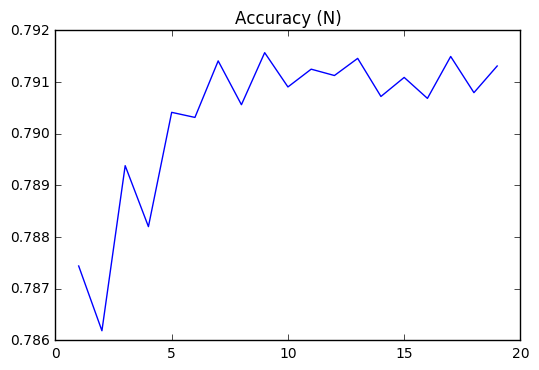

In [34]:
plt.plot(N_array, acc_array)
plt.title('Accuracy (N)')
plt.show()

In [35]:
knn = neighbors.KNeighborsClassifier( 9)
knn.fit( X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [36]:
Knn_pred = knn.predict(X_test ) 

In [37]:
#доля правильно классифицированных движений
print(np.mean(y_test == Knn_pred))
#доля неправильно классифицированных движений
print(1 - np.mean(y_test == Knn_pred))

0.996221198157
0.00377880184332


Normalized confusion matrix
[[  9.93e-01   5.08e-03   1.84e-03   0.00e+00   0.00e+00]
 [  4.47e-04   9.91e-01   8.94e-03   0.00e+00   0.00e+00]
 [  0.00e+00   8.66e-04   9.99e-01   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   1.00e+00   0.00e+00]
 [  8.63e-04   0.00e+00   0.00e+00   5.75e-04   9.99e-01]]


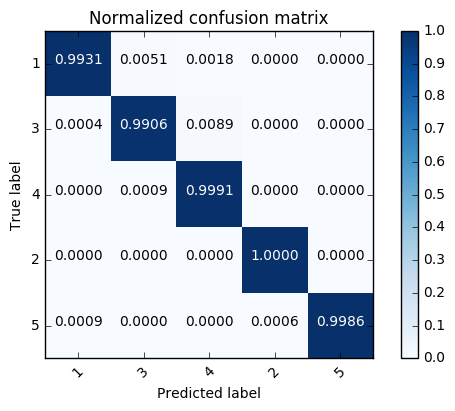

In [38]:
cnf_matrix = confusion_matrix(y_test,Knn_pred)

class_names = list(y_test.unique())
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
for i in variables:
    variables2 = variables.copy()
    variables2.remove(i)


    knn = neighbors.KNeighborsClassifier( 9)
    knn.fit( X_train[variables2], y_train) 
    Knn_pred = knn.predict(X_test[variables2] ) 
    cnf_matrix = confusion_matrix(y_test,Knn_pred)
    errors = (cnf_matrix/np.sum(cnf_matrix, axis = 1))[0][2] +(cnf_matrix/np.sum(cnf_matrix, axis = 1))[2][0] 
    
    print( i, errors)

X0 0.0020202020202
X1 0.00360444640106
X2 0.0015873015873
X3 0.0018759018759
X4 0.001443001443
X5 0.0018759018759
X6 0.0017316017316
X7 0.0017316017316
X8 0.00215533054516
X9 0.0018759018759
X10 0.0018759018759
X11 0.0011544011544
X12 0.0015873015873
X13 0.0020202020202
X14 0.001443001443
X15 0.0041847041847
X16 0.0018759018759
X17 0.0017316017316
X18 0.0018759018759
X19 0.0018759018759
X20 0.0015873015873
X21 0.0018759018759


### Problem 5

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
best_acc = 0
best_i = 0
            

for i in [ 0.2, 0.5, 0.7, 1, 1.5, 2, 3,4,5]:
          

        
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'logistic',
                    hidden_layer_sizes= int((len(variables) *i)), random_state=1)


        clf = clf.fit(X_train[variables], y_train)
        pred = clf.predict( X_test[variables])  
        score_acc = clf.score (  X_test[variables], y_test)
        if score_acc > best_acc:
            best_acc = score_acc
            best_i = i
            
        print ("i: " , i, "accuracy ", score_acc)

print ( "best_accuracy: "  ,best_acc ,
"best_i: ", best_i )

i:  0.2 accuracy  0.93222734255
i:  0.5 accuracy  0.957818740399
i:  0.7 accuracy  0.973701996928
i:  1 accuracy  0.967035330261
i:  1.5 accuracy  0.976098310292
i:  2 accuracy  0.976866359447
i:  3 accuracy  0.973548387097
i:  4 accuracy  0.980552995392
i:  5 accuracy  0.985407066052
best_accuracy:  0.985407066052 best_i:  5


In [42]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'logistic',
            hidden_layer_sizes= int((len(variables) *best_i)), random_state=1)


clf = clf.fit(X_train[variables], y_train)
pred = clf.predict( X_test[variables])  

In [43]:
#доля правильно классифицированных движений
print(np.mean(y_test == pred))
#доля неправильно классифицированных движений
print(1 - np.mean(y_test == pred))

0.985407066052
0.0145929339478


Normalized confusion matrix
[[  9.80e-01   1.77e-02   2.82e-03   0.00e+00   0.00e+00]
 [  4.62e-03   9.69e-01   2.52e-02   1.49e-04   5.96e-04]
 [  4.33e-04   1.50e-02   9.85e-01   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   1.00e+00   3.59e-04]
 [  1.73e-03   0.00e+00   8.63e-04   1.73e-03   9.96e-01]]


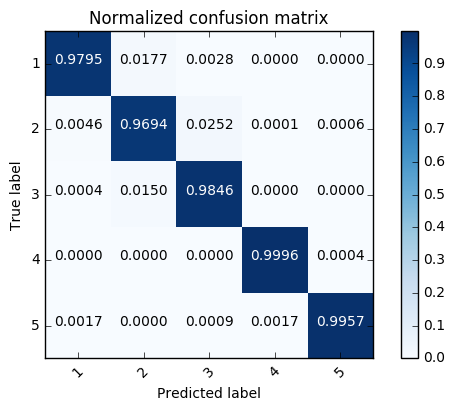

In [44]:
cnf_matrix = confusion_matrix(y_test,pred)

class_names = [1,2,3,4,5]
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [45]:
for i in variables:
    variables2 = variables.copy()
    variables2.remove(i)


    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'logistic',
            hidden_layer_sizes= int((len(variables) *best_i)), random_state=1)


    clf = clf.fit(X_train[variables2], y_train)
    pred = clf.predict( X_test[variables2])  

    cnf_matrix = confusion_matrix(y_test,pred)
    errors = (cnf_matrix/np.sum(cnf_matrix, axis = 1))[0][2] +(cnf_matrix/np.sum(cnf_matrix, axis = 1))[2][0] 
    
    print( i, errors)

X0 0.0100826668623
X1 0.0120814684374
X2 0.00441827475726
X3 0.00287377406021


KeyboardInterrupt: 

### Problem 6

In [54]:
from sklearn import ensemble
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [57]:
clf = ensemble.GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1 ,max_depth= 5,min_samples_leaf=100)
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
boosting_predict = clf.predict( X_test)

Normalized confusion matrix
[[  9.99e-01   4.24e-04   1.41e-04   0.00e+00   0.00e+00]
 [  0.00e+00   9.99e-01   8.94e-04   0.00e+00   0.00e+00]
 [  0.00e+00   5.77e-04   9.99e-01   0.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   1.00e+00   0.00e+00]
 [  0.00e+00   0.00e+00   0.00e+00   0.00e+00   1.00e+00]]


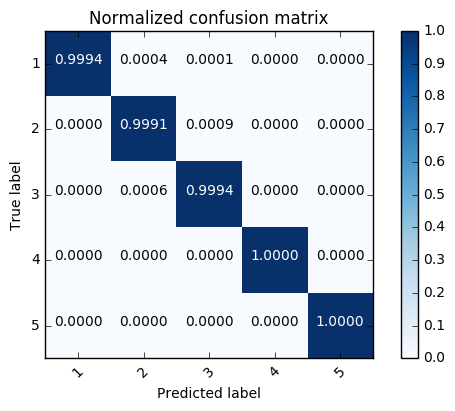

In [59]:
cnf_matrix = confusion_matrix(y_test,boosting_predict )

class_names = [1,2,3,4,5]
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [60]:
#доля правильно классифицированных движений
print(np.mean(y_test == boosting_predict ))
#доля неправильно классифицированных движений
print(1 - np.mean(y_test == boosting_predict ))

0.999569892473
0.000430107526882


In [61]:
#точность градиентного бустинга оказалась самой большой

In [62]:
list(clf.feature_importances_)

[0.24277115567298968,
 0.10489946134770937,
 0.067424013228440313,
 0.028617324112884736,
 0.039236540434594097,
 0.0023340644252260985,
 0.0036768906347472187,
 0.0038032617932256714,
 0.16976997003760452,
 0.0092658769374763198,
 0.024096875109166117,
 0.066487587206658857,
 0.0032532832514287884,
 0.0062051314429836446,
 0.0015179866263781625,
 0.097482379520504925,
 0.029411252592850733,
 0.021233695922449846,
 0.021204161982175021,
 0.00085449323022858447,
 0.0018694664028573419,
 0.0045851280874200061]

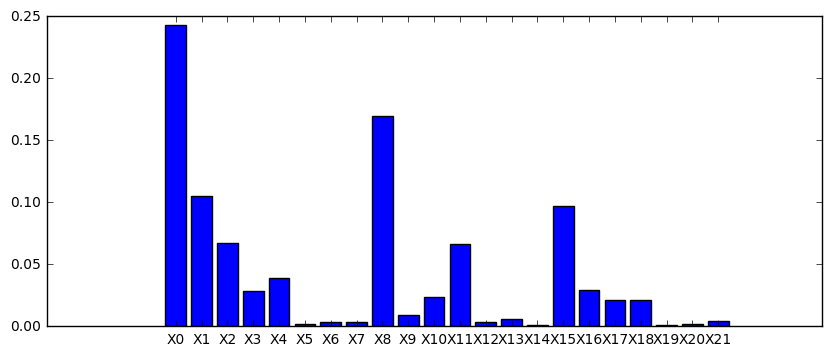

In [63]:
plt.figure( figsize = (10, 4))
x = np.arange( len(clf.feature_importances_) )
money = list(clf.feature_importances_)


plt.bar(x, money , align='center' )
plt.xticks(x, variables )
plt.show()